# Logistic Regression with Python

# Titanic Project

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
train=pd.read_csv('titanic_train.csv')

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing Data

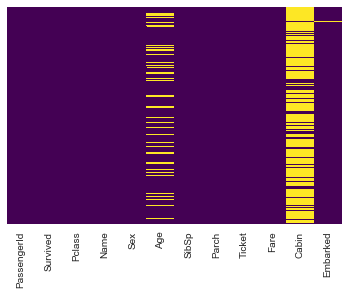

In [70]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

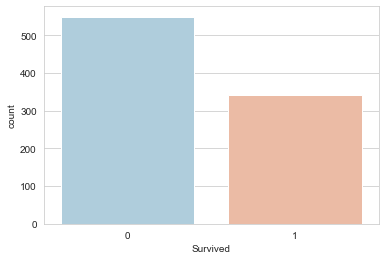

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette="RdBu_r")

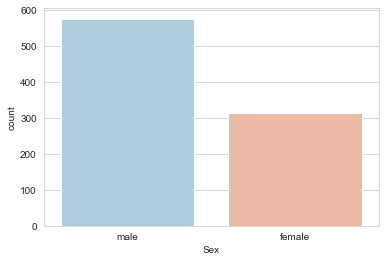

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=train,palette="RdBu_r")

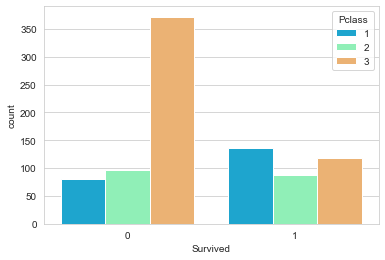

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette="rainbow")

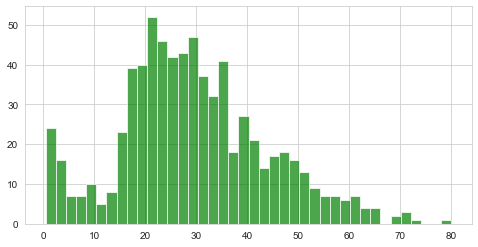

In [74]:
train['Age'].hist(bins=40,color="green",alpha=0.7,figsize=(8,4))

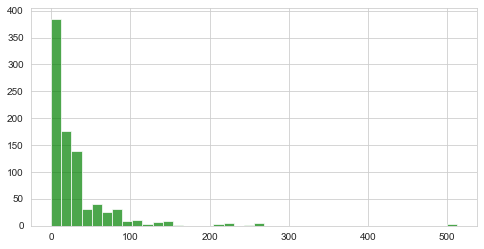

In [75]:
train['Fare'].hist(bins=40,color="green",alpha=0.7,figsize=(8,4))

# Data Cleaning 

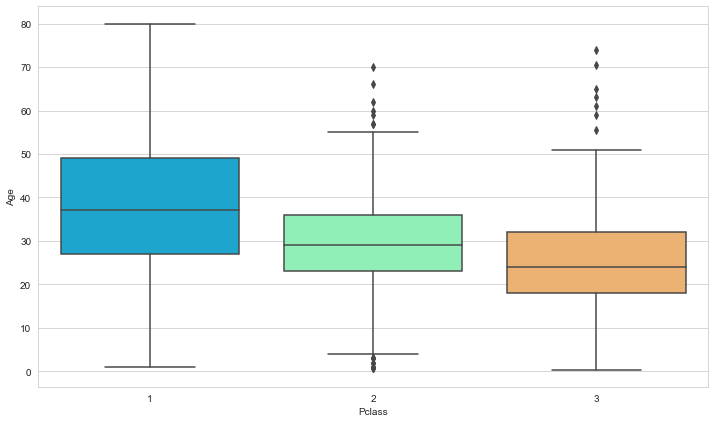

In [76]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train, palette='rainbow')

In [77]:
def compute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else: 
            return Age

In [78]:
train['Age']=train[['Age','Pclass']].apply(compute_age,axis=1)

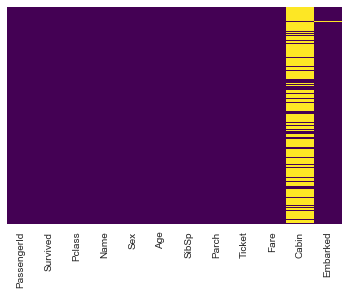

In [79]:
sns.heatmap(train.isnull(), yticklabels=False,cmap='viridis',cbar=False)

In [80]:
train.drop('Cabin', inplace=True,axis=1)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [83]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [84]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)

In [85]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [86]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [87]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [88]:
train = pd.concat([train,Sex,embark],axis=1)


In [89]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [90]:
y=train['Survived']

In [91]:
X = train.drop(['Survived'],axis=1)

In [92]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [93]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=101)

# training and prediction

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logreg=LogisticRegression()

In [97]:
logreg.fit(X_train, y_train)

C:\Users\Aimen Javed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
predictions = logreg.predict(X_test)

# Evaluation

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.83      0.65      0.73        80

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [101]:
pred = logreg.predict(X)

In [102]:
X.shape

(891, 9)

In [103]:
submission=pd.DataFrame({'PassengerId':X['PassengerId'],'Survived':pred
                        })

In [107]:
submission

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,1
889,890,0


In [108]:
submission.to_csv('submission.csv')